# Cây quyết định - Decision Tree

- Nó thuộc cả 2 loại giải thuật là dự đoán và hồi quy
- Thường được dùng để mô phỏng chính xác con người suy nghĩ và đưa ra ý kiến
- VD: Dựa vào ngoài trời, và 2 trạng thái 0 và 1 đại diện lần lượt cho không được đi chơi và được đi chơi:
    - Nếu trời nắng: Dựa vào độ ẩm:
        - Nếu độ ẩm trên 75% --> 1
        - Nếu độ ẩm dưới 75% --> 0
    - Nếu trời bình thường --> 1
    - Nếu trời mưa:
        - Nếu trời nhiều gió --> 0
        - Nếu trời ít gió --> 1

- Một số khái niệm:
    - Nodes: Là các điểm mà cây được rẽ nhánh
    - Edges: Là đường nối
    - Root: Nốt mà chỉ có đầu vào
    - Leaves: Nốt mà chỉ có đầu ra

- Có các loại cây:
    - Classification tree - Cây phân loại: Trả về True/False
    - Regression tree - Cây hồi quy: Trả về 1 giá trị

# Classification tree

## Phương pháp GINI:
- B1: Tạo bảng tổng hợp cho mỗi cặp điều kiện, mỗi bảng tổng hợp bao gồm xác suất điều kiện đó đúng hoặc sai.
- B2: Tính các chỉ số:
    - GINI = 1 - P(Yes)^2 - P(No)^2 của cả 2 nhánh
        - P(Yes) = Số người đúng trên tổng số người
        - P(No) = Số người sai trên tổng số người
    - GINI tổng hợp = Số người đúng / (Số người đúng + Số người sai) * P(Yes) +
                      Số người sai / (Số người đúng + Số người sai) * P(No)
- B3: Chọn bảng có GINI tổng hợp lớn nhất
- B4: Gọi đệ quy tới từng nhánh của bảng với các cột ngoài 2 cột trên. Nếu GINI của cấp dưới lớn hơn GINI của lớp trên, dừng lại.

- Ưu điểm:
    - Dễ Visualize và dễ giải thích
    - Dễ khai phá dữ liệu
    - Yêu cầu ít việc làm sạch dữ liệu
    - Data type có thể là biến liên ttucj hoặc biến phân loại
- Nhược điểm:
    - Dễ bị Overfit
    - Nó không dự đoán kết quả chính xác (Thường thì có những cách khắc phục như PRUNING, thuật toán Kriging, thuật toán Random-Forest)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

# Regression Tree

- Như Classification tree, nhưng chỉ khác giá trị trả về.

## Sử dụng phương pháp Sum Square Error:
- B1: Chia dữ liệu thành 2 phần bằng nhau theo y, đó là đường thẳng y = b
- B2: Tính giá trị z = sigma((x_i - b)^2).
- B3: Lặp lại B1 và B2 với đường thẳng y = b, với b là trung bình giữa 2 điểm gần nhau.
- B4: Chọn y = b sao cho z nhỏ nhất

# Code Python cho Classification Tree

In [4]:
# Tạo dữ liệu để train model
X = df.iloc[:, :-1]
Y = df['Classification'] - 1

X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [5]:
# Tạo dữ liệu
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [7]:
# Xây dựng cây nhị phân
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

Tree = DecisionTreeClassifier()
Tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
y_pred = Tree.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

cm

array([[5, 1],
       [0, 6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

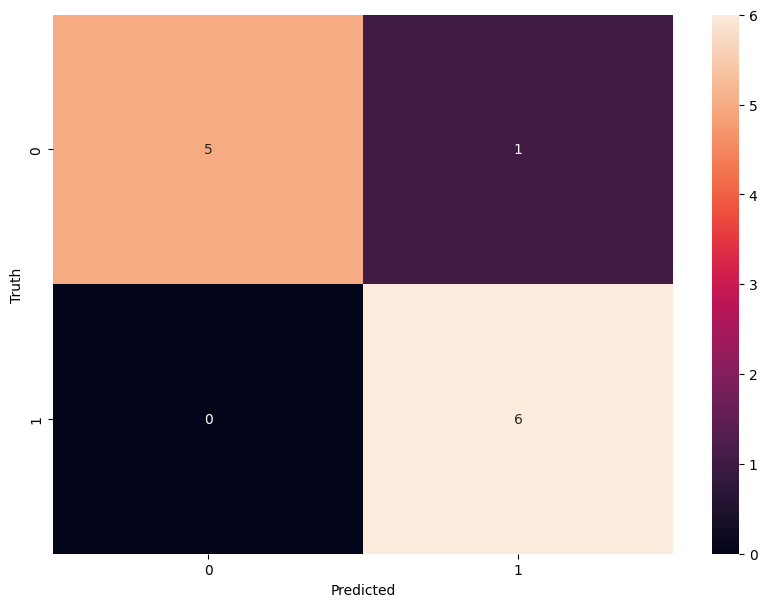

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Code Python cho Regression Tree

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import pandas as pd

# Tạo dữ liệu giả với 100 mẫu và 3 đặc trưng
X, y = make_regression(n_samples=10000, n_features=3, noise=0.1, random_state=12)

# Chuyển dữ liệu thành DataFrame pandas
df = pd.DataFrame(data=X, columns=['feature1', 'feature2', 'feature3'])
df['target'] = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Dự đoán kết quả
y_pred = regressor.predict(X_test)

# Tính toán và in ra Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.3125371229170709
